In [4]:
import os
import pandas as pd
print(os.listdir())

['AI Resume Analyser akshat.code-workspace', 'code1.png', 'code2.png', 'code3.png', 'code4.png', 'CodeBlocks.lnk', 'desktop.ini', 'image.jpg', 'Microsoft 365.lnk', 'new.html', 'page2.html', 'restaurant.ipynb', 'sc1.png', 'ScreenRec.lnk', 'Screenshot 2024-07-07 070111.png', 'Smart Resume Analyser', 'smart reusume analyser', 'ss.png', 'ss1.png', 'ss3.png']


In [5]:
df=pd.read_csv(r'C:\Users\text0\AppData\Local\Programs\Microsoft VS Code\Dataset .csv')


In [6]:
df.dropna(inplace=True)

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(df[['Cuisines', 'Locality']])
encoded_df = pd.DataFrame(encoded_array.toarray())

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_df, df['Aggregate rating'], test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE:{mse:.2f}, R-squared: {r2:.2f}')

MSE:242407319586106988065456128.00, R-squared: -105853236240744633002360832.00


In [11]:
coefficients = model.coef_
print(coefficients)

[-1.37861965e+12 -5.68084403e+13 -1.37861965e+12 ...  1.41111691e+12
  8.39967592e+12 -1.94065063e+14]


In [12]:
importances =abs(coefficients)
importances = importances / importances.sum()
print(importances)

[4.62080036e-05 1.90408182e-03 4.62080036e-05 ... 4.72972335e-05
 2.81536866e-04 6.50459259e-03]


In [13]:
categories = encoder.categories_
new_data = pd.DataFrame({'Cuisines': [categories[0][0], categories[0][1], categories[0][0]], 
                         'Locality': [categories[1][0], categories[1][1], categories[1][0]]})
new_data_encoded = encoder.transform(new_data)
new_pred = model.predict(new_data_encoded.toarray())
print(new_pred)

[ 4.35877228e+00 -5.54298206e+13  4.35877228e+00]


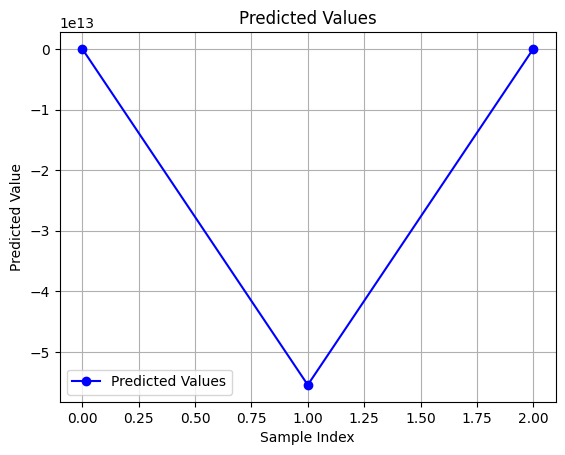

In [14]:
import matplotlib.pyplot as plt

# Assuming new_pred is a 1D array of predicted values
plt.plot(new_pred, marker='o', linestyle='-', color='blue', label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [16]:
# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

In [17]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [19]:
# Evaluate the model using Mean Squared Error
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt:.2f}, R-squared (Decision Tree): {r2_dt:.2f}')

MSE (Decision Tree): 2.01, R-squared (Decision Tree): 0.12


In [20]:
# Use cross-validation to evaluate the model
scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE (Decision Tree): {-scores.mean():.2f}')

Cross-validated MSE (Decision Tree): 2.01


In [21]:
# Make predictions on new data
new_pred_dt = dt_model.predict(new_data_encoded.toarray())
print(new_pred_dt)

[3.4 4.3 3.4]


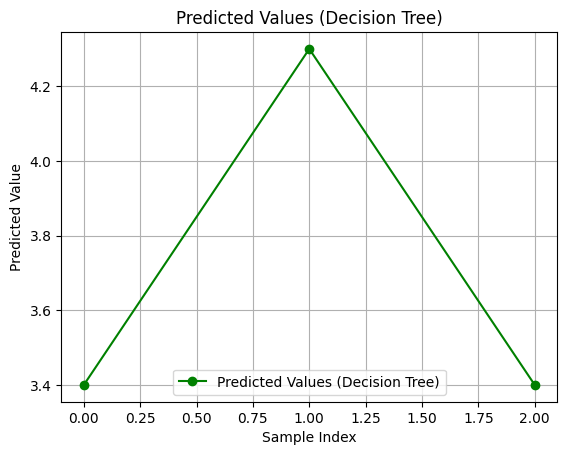

In [22]:
# Plot the predicted values
plt.plot(new_pred_dt, marker='o', linestyle='-', color='green', label='Predicted Values (Decision Tree)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values (Decision Tree)')
plt.grid(True)
plt.legend()
plt.show()

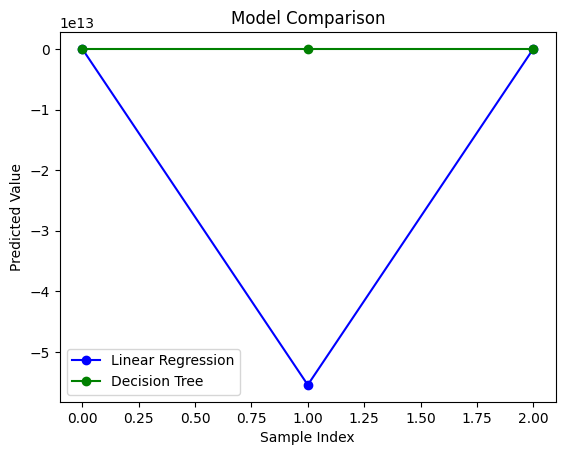

In [23]:
import matplotlib.pyplot as plt
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the predicted values for Linear Regression
ax.plot(new_pred, marker='o', linestyle='-', color='blue', label='Linear Regression')

# Plot the predicted values for Decision Tree
ax.plot(new_pred_dt, marker='o', linestyle='-', color='green', label='Decision Tree')

# Set title and labels
ax.set_title('Model Comparison')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Predicted Value')

# Add legend
ax.legend()

# Show the plot
plt.show()